In [ ]:
library("MASS")
library(tidyverse)
library(caret)
library(ggplot2)
library(splines)
library(mgcv)
library(corrplot)
library(splines)
library(randomForest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(caret): there is no package called ‘caret’


CARGA DE LOS DATASETS

In [ ]:
train_data <- read.csv("/content/train.csv", header = TRUE, sep = ",", dec = ".")
test_data <- read.csv("/content/test.csv", header = TRUE, sep = ",", dec = ".")

DESCRIPCIÓN DE LOS DATOS

In [ ]:
head(train_data)
head(test_data)

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,1648,11,10042,68,35,22609.49,30,66307,8,Grande,2,43747.69
2,1259,3,11909,107,42,24561.99,35,29107,8,Grande,2,37483.69
3,674,13,10669,75,33,38914.22,52,9519,4,Median,3,57523.00
4,1558,7,6981,65,19,39204.97,30,28651,7,Grande,1,50338.06
5,1626,22,10940,74,37,23947.08,46,30654,7,Grande,2,45675.55
6,939,8,12689,110,55,29968.16,57,30528,7,Median,1,78428.06


,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,<lgl>
1,22,3,9115,65,30,26496.36,27,21936,2,Grande,3,NA
2,14,18,8438,82,35,20911.52,22,25542,1,Grande,2,NA
3,91,5,11890,92,50,24474.30,53,18591,9,Grande,1,NA
4,32,20,9003,54,27,33446.10,26,23028,2,Grande,3,NA
5,28,8,9152,91,24,27234.64,22,20214,2,Grande,3,NA
6,109,15,8697,88,34,25929.75,26,23192,2,Grande,1,NA


In [ ]:
str(train_data)
summary(train_data)

'data.frame':	1600 obs. of  12 variables:
 $ idloc    : int  1648 1259 674 1558 1626 939 176 782 163 1703 ...
 $ edadloc  : int  11 3 13 7 22 8 22 8 4 4 ...
 $ correo   : int  10042 11909 10669 6981 10940 12689 9773 13018 9546 13050 ...
 $ paginas  : int  68 107 75 65 74 110 73 106 84 112 ...
 $ telefono : int  35 42 33 19 37 55 34 45 39 46 ...
 $ impresa  : num  22609 24562 38914 39205 23947 ...
 $ servicio : int  30 35 52 30 46 57 50 41 25 39 ...
 $ nomina   : int  66307 29107 9519 28651 30654 30528 27890 11107 111305 34739 ...
 $ idmercado: int  8 8 4 7 7 7 8 3 7 9 ...
 $ tamamer  : chr  "Grande" "Grande" "Median" "Grande" ...
 $ promo    : int  2 2 3 1 2 1 3 1 2 1 ...
 $ ropamujer: num  43748 37484 57523 50338 45676 ...


     idloc           edadloc          correo         paginas      
 Min.   :   1.0   Min.   : 1.00   Min.   : 1147   Min.   : 51.00  
 1st Qu.: 495.8   1st Qu.: 4.00   1st Qu.: 9644   1st Qu.: 74.00  
 Median : 996.0   Median : 9.00   Median :10480   Median : 84.00  
 Mean   : 995.5   Mean   :10.47   Mean   :10599   Mean   : 85.04  
 3rd Qu.:1495.2   3rd Qu.:17.00   3rd Qu.:11764   3rd Qu.: 98.00  
 Max.   :1998.0   Max.   :25.00   Max.   :15259   Max.   :114.00  
    telefono        impresa         servicio         nomina      
 Min.   :17.00   Min.   :18061   Min.   :15.00   Min.   :   901  
 1st Qu.:30.00   1st Qu.:23562   1st Qu.:33.00   1st Qu.: 10680  
 Median :36.00   Median :28735   Median :43.00   Median : 18886  
 Mean   :37.64   Mean   :28835   Mean   :43.65   Mean   : 24104  
 3rd Qu.:43.00   3rd Qu.:34023   3rd Qu.:54.00   3rd Qu.: 31637  
 Max.   :59.00   Max.   :40028   Max.   :68.00   Max.   :135882  
   idmercado       tamamer              promo         ropamujer     


In [ ]:
str(test_data)
summary(test_data)

'data.frame':	400 obs. of  12 variables:
 $ idloc    : int  22 14 91 32 28 109 46 82 55 45 ...
 $ edadloc  : int  3 18 5 20 8 15 11 11 7 5 ...
 $ correo   : int  9115 8438 11890 9003 9152 8697 9731 11096 10078 10206 ...
 $ paginas  : int  65 82 92 54 91 88 80 87 66 88 ...
 $ telefono : int  30 35 50 27 24 34 33 43 27 32 ...
 $ impresa  : num  26496 20912 24474 33446 27235 ...
 $ servicio : int  27 22 53 26 22 26 33 36 37 35 ...
 $ nomina   : int  21936 25542 18591 23028 20214 23192 21827 17425 19664 22526 ...
 $ idmercado: int  2 1 9 2 2 2 4 8 5 4 ...
 $ tamamer  : chr  "Grande" "Grande" "Grande" "Grande" ...
 $ promo    : int  3 2 1 3 3 1 1 2 2 1 ...
 $ ropamujer: logi  NA NA NA NA NA NA ...


     idloc           edadloc          correo         paginas     
 Min.   :  14.0   Min.   : 1.00   Min.   : 1223   Min.   : 51.0  
 1st Qu.: 529.8   1st Qu.: 4.00   1st Qu.: 9609   1st Qu.: 74.0  
 Median :1016.0   Median : 8.00   Median :10426   Median : 86.0  
 Mean   :1020.4   Mean   :10.25   Mean   :10548   Mean   : 85.1  
 3rd Qu.:1552.5   3rd Qu.:16.00   3rd Qu.:11920   3rd Qu.: 98.0  
 Max.   :2000.0   Max.   :25.00   Max.   :15263   Max.   :114.0  
    telefono        impresa         servicio         nomina     
 Min.   :17.00   Min.   :18173   Min.   :15.00   Min.   : 2101  
 1st Qu.:31.00   1st Qu.:24083   1st Qu.:33.00   1st Qu.:11487  
 Median :36.00   Median :28810   Median :43.00   Median :20818  
 Mean   :37.47   Mean   :28779   Mean   :43.62   Mean   :25690  
 3rd Qu.:44.00   3rd Qu.:33554   3rd Qu.:55.00   3rd Qu.:36718  
 Max.   :59.00   Max.   :40012   Max.   :68.00   Max.   :97686  
   idmercado       tamamer              promo       ropamujer     
 Min.   :1.000  

Análisis descriptivo

GRAFICOS DE LA DISTRIBUCIÓN DE LAS VARIABLES

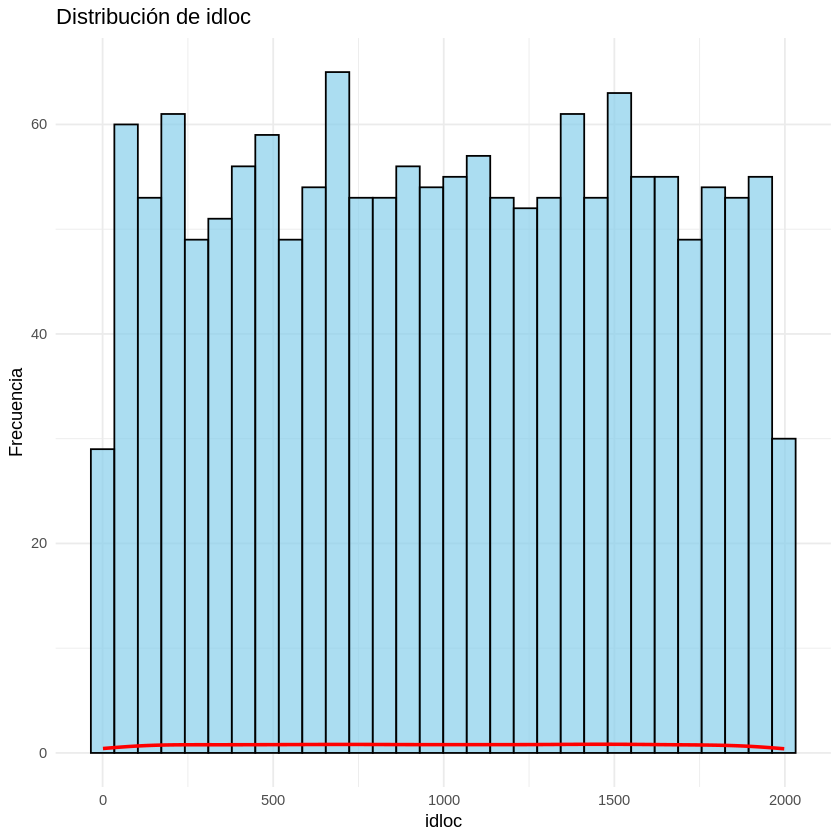

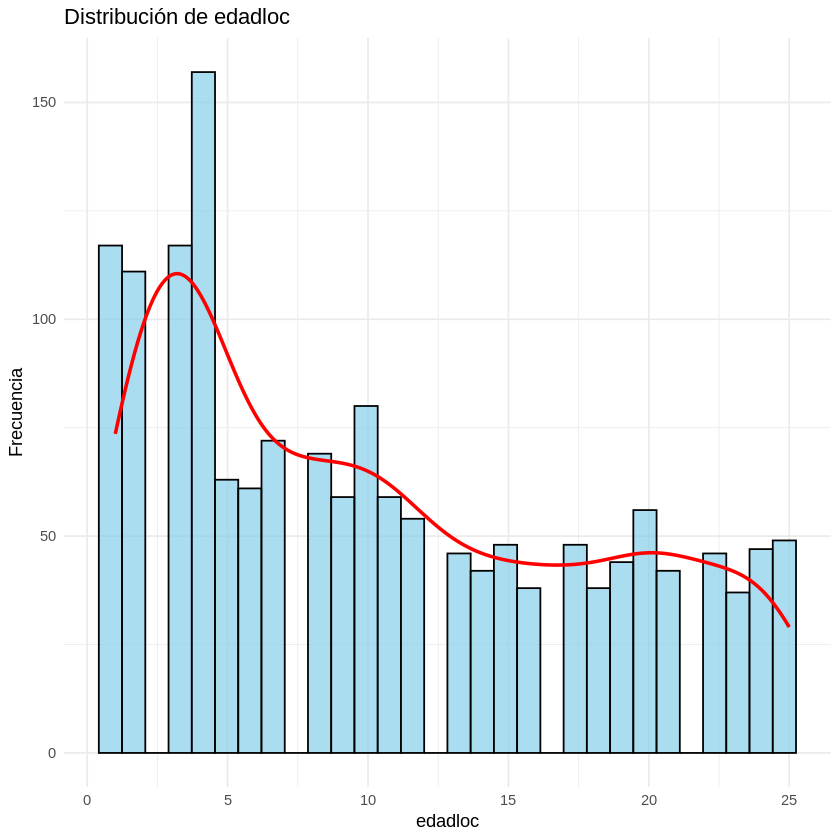

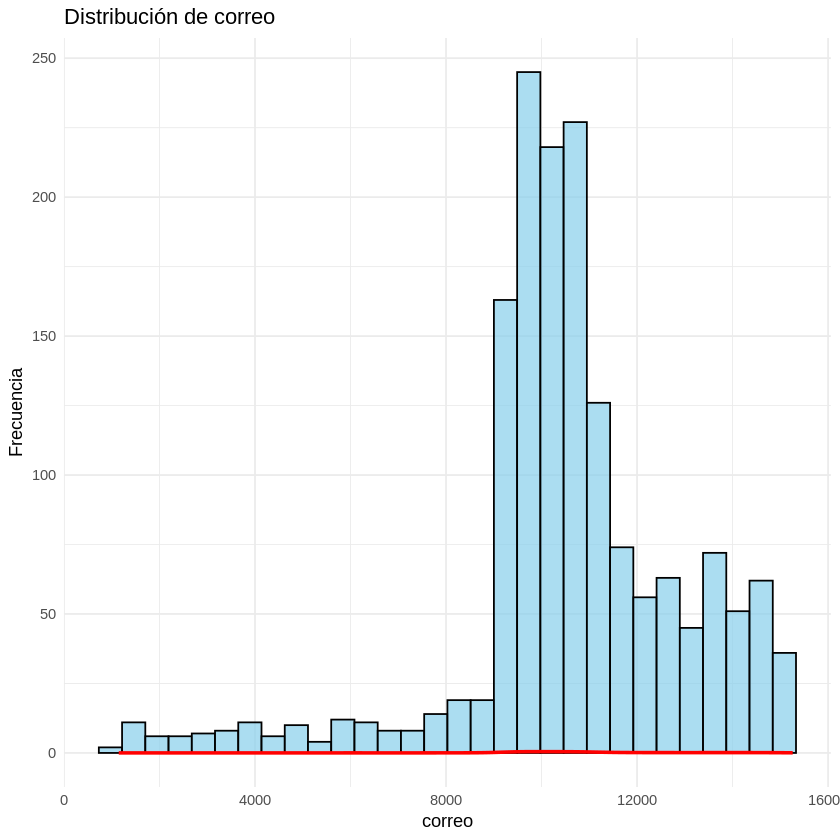

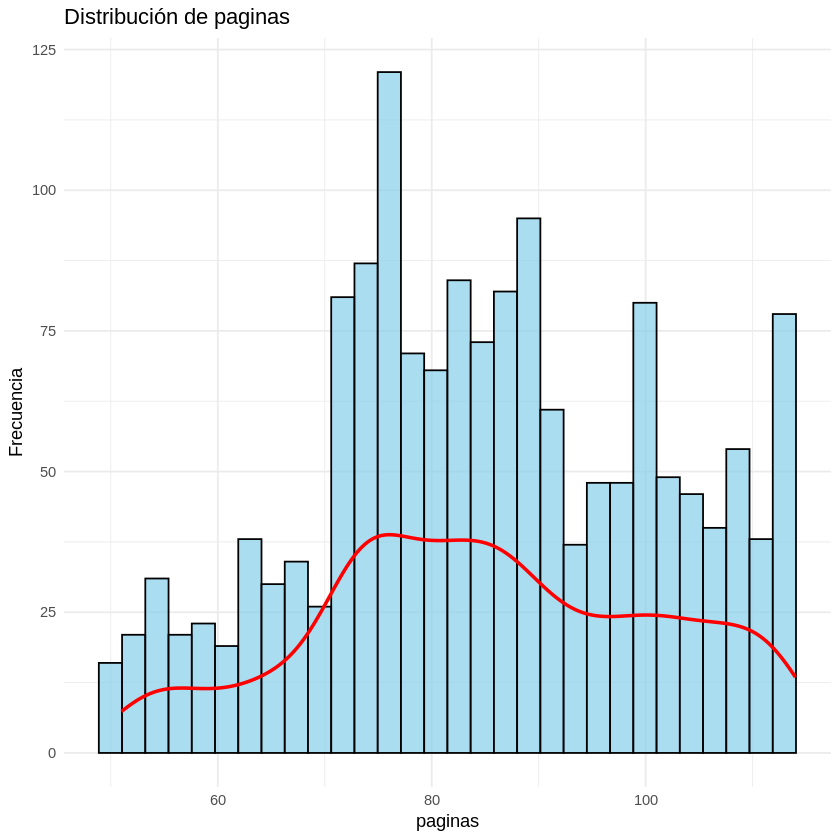

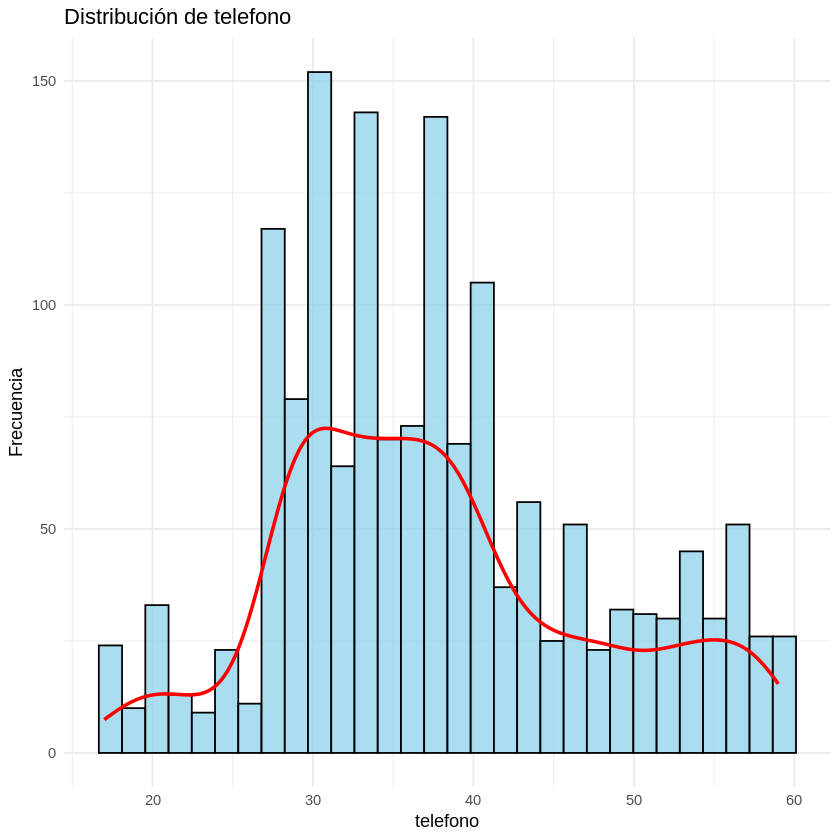

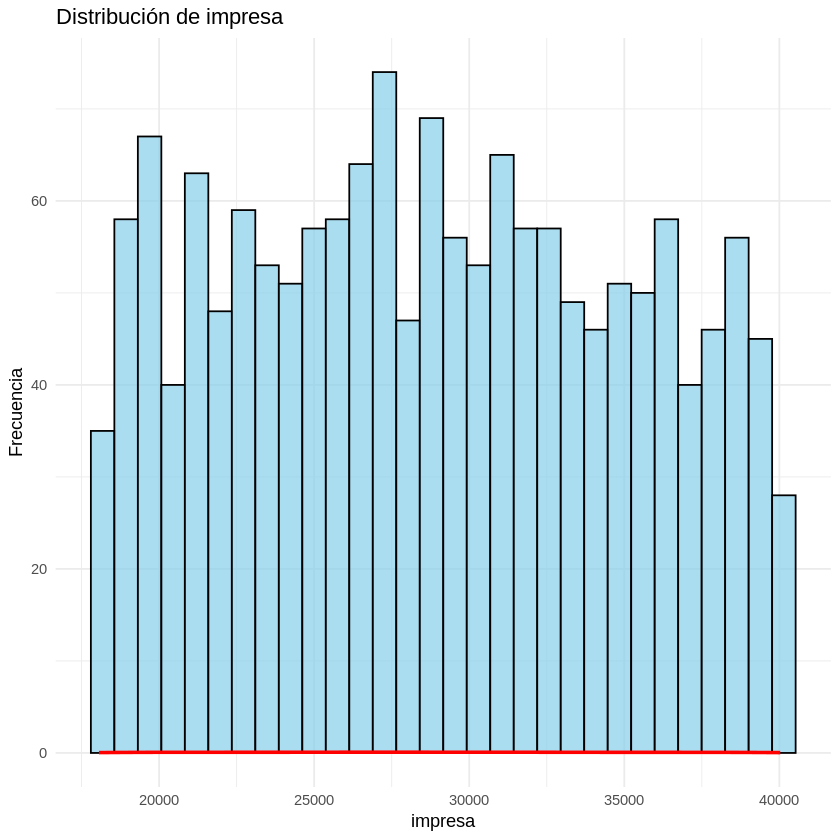

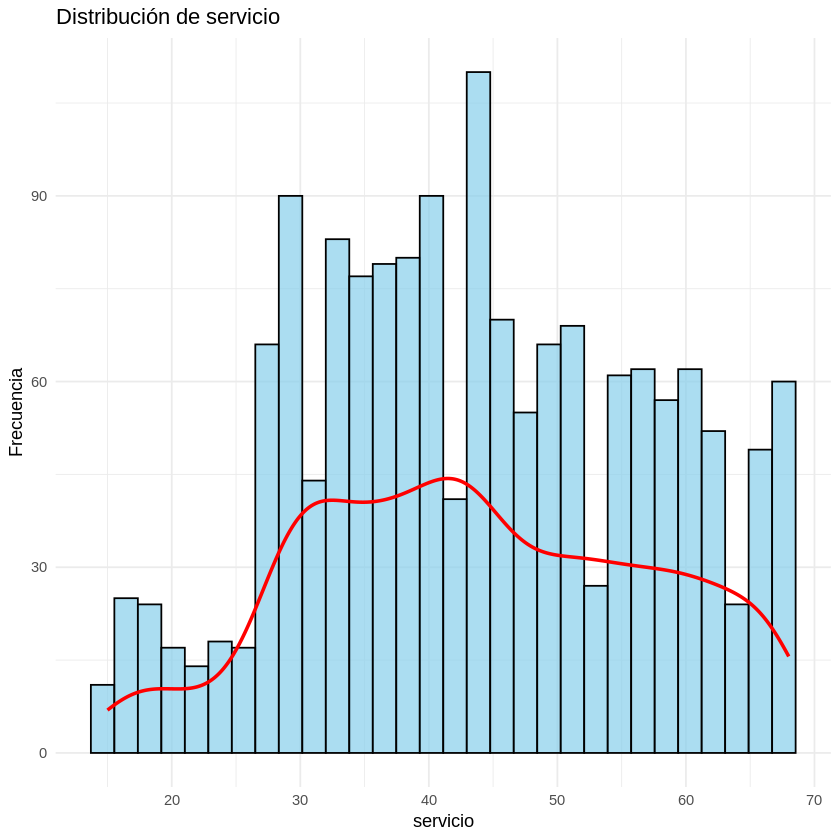

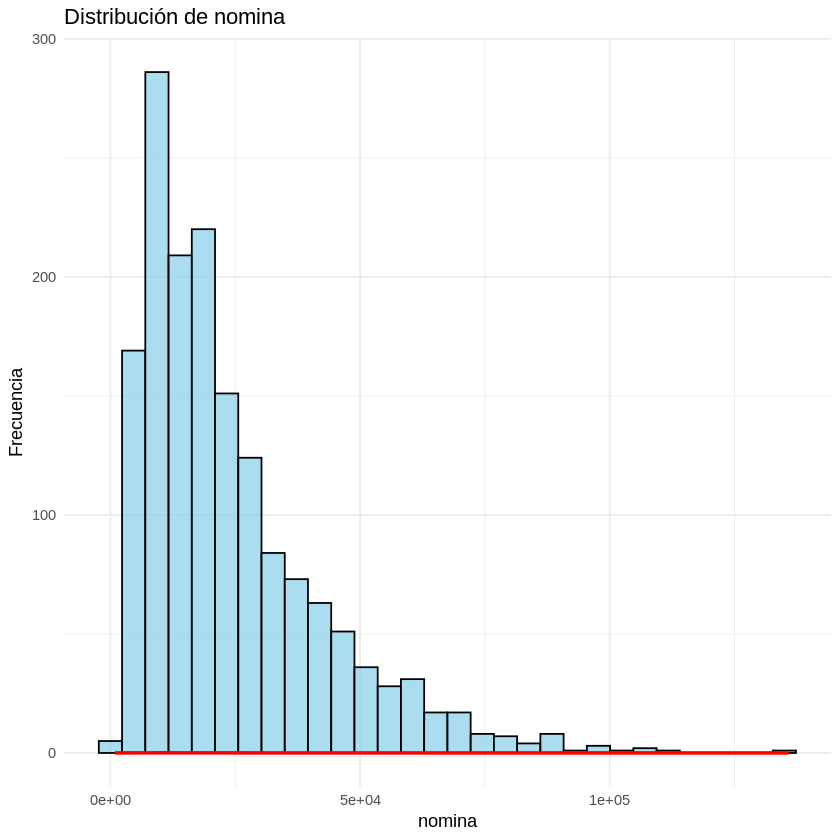

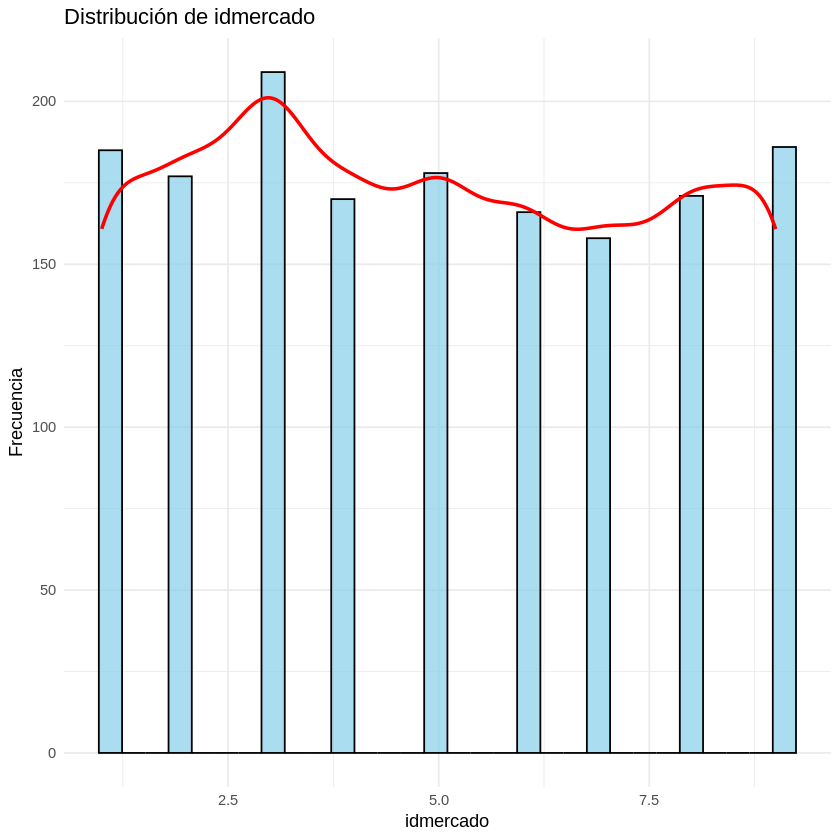

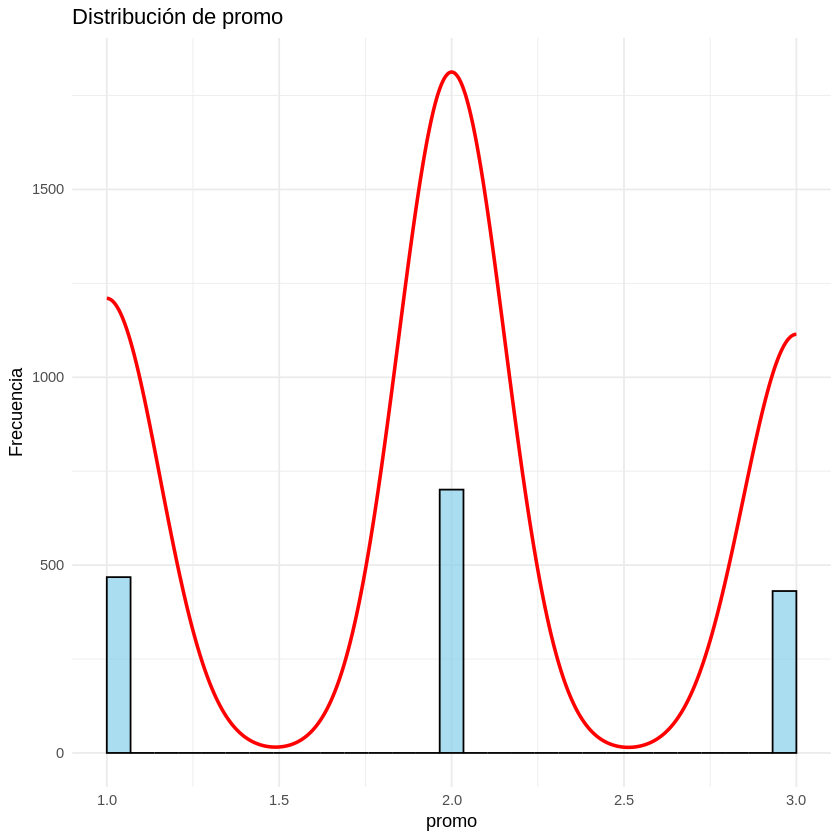

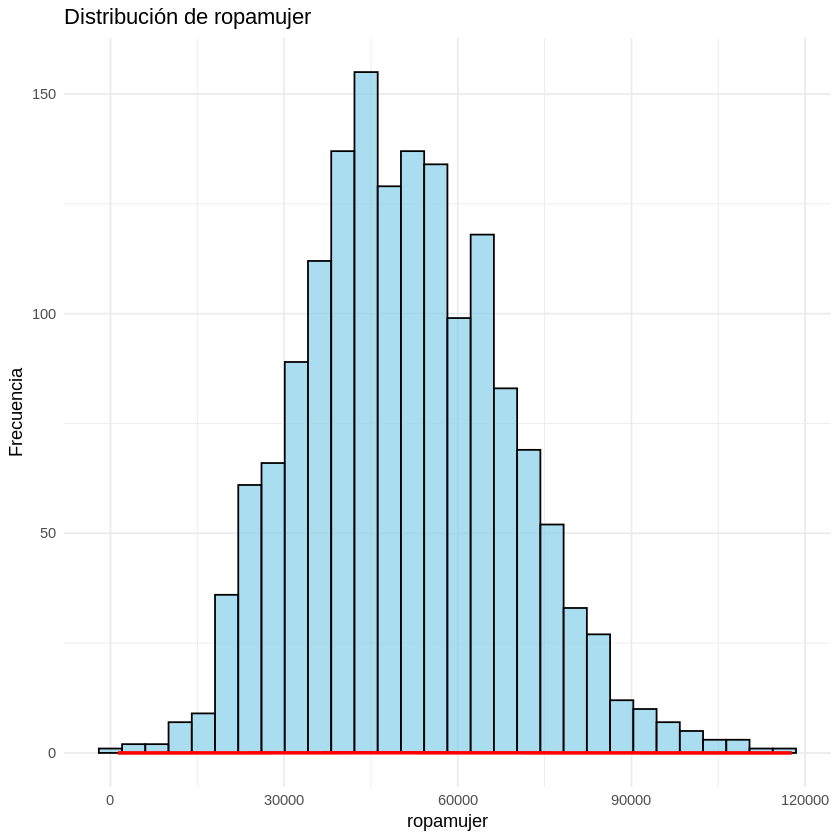

In [ ]:
numeric_cols <- sapply(train_data, is.numeric)
numeric_data <- train_data[, numeric_cols]

# Histograma para cada variable numérica
for (col in names(numeric_data)) {
  print(
    ggplot(train_data, aes_string(x = col)) +
      geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
      geom_density(aes(y = ..count..), color = "red", size = 1) +
      labs(title = paste("Distribución de", col), x = col, y = "Frecuencia") +
      theme_minimal()
  )
}


MATRIZ DE CORRELACIÓN

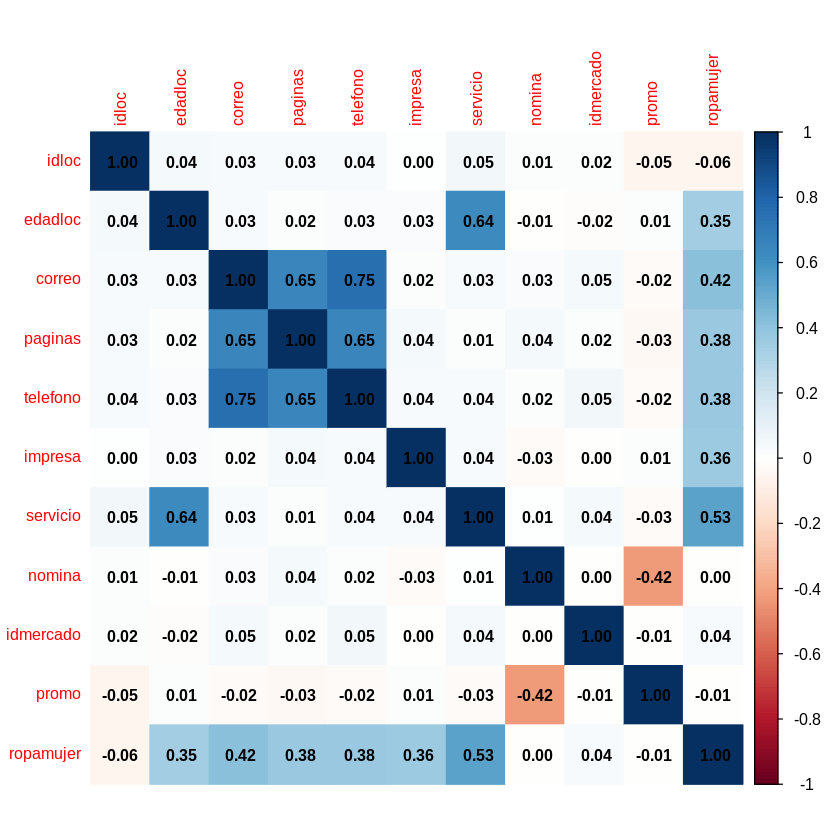

In [ ]:
#install.packages("corrplot")

#library(corrplot)

# Matriz de correlación
cor_matrix <- cor(numeric_data, use = "complete.obs")
corrplot::corrplot(cor_matrix, method = "color", tl.cex = 0.8, number.cex = 0.8, addCoef.col = "black")

Variables Categoricas

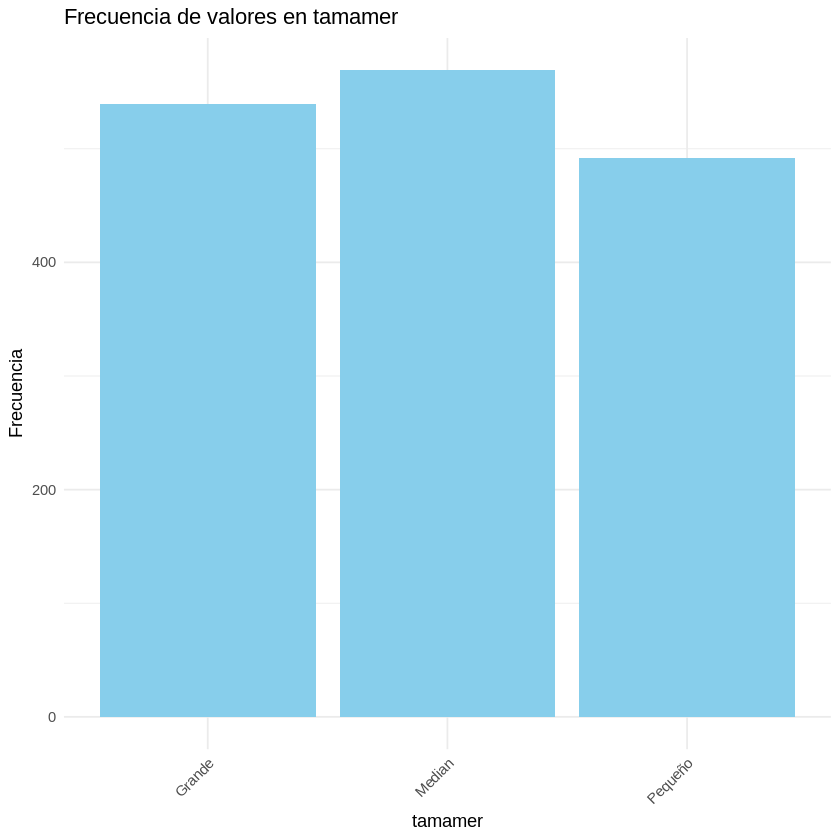

In [ ]:

# Encuentra columnas categóricas (tipo factor o character)
categorical_cols <- names(train_data)[sapply(train_data, function(x) is.factor(x) || is.character(x))]

# Graficar cada una
for (col in categorical_cols) {
  p <- ggplot(train_data, aes_string(x = col)) +
    geom_bar(fill = "skyblue") +
    labs(title = paste("Frecuencia de valores en", col), x = col, y = "Frecuencia") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  print(p)
}


CALIDAD DE LOS DATOS Y PREPARACIÓN DE LOS DATOS

Transformación de tipos de variables

In [ ]:
train <- train_data[, !names(train_data) %in% c("idloc")]
train$tamamer=as.factor(train$tamamer)
train$promo=as.factor(train$promo)
train$idmercado=as.factor(train$idmercado)

test <- test_data[, !names(test_data) %in% c("idloc")]
test$tamamer=as.factor(test$tamamer)
test$tamamer=as.factor(test$tamamer)
test$promo=as.factor(test$promo)
test$idmercado=as.factor(test$idmercado)

str(train)
str(test)
set.seed(920203)

'data.frame':	1600 obs. of  11 variables:
 $ edadloc  : int  11 3 13 7 22 8 22 8 4 4 ...
 $ correo   : int  10042 11909 10669 6981 10940 12689 9773 13018 9546 13050 ...
 $ paginas  : int  68 107 75 65 74 110 73 106 84 112 ...
 $ telefono : int  35 42 33 19 37 55 34 45 39 46 ...
 $ impresa  : num  22609 24562 38914 39205 23947 ...
 $ servicio : int  30 35 52 30 46 57 50 41 25 39 ...
 $ nomina   : int  66307 29107 9519 28651 30654 30528 27890 11107 111305 34739 ...
 $ idmercado: Factor w/ 9 levels "1","2","3","4",..: 8 8 4 7 7 7 8 3 7 9 ...
 $ tamamer  : Factor w/ 3 levels "Grande","Median",..: 1 1 2 1 1 2 2 2 1 1 ...
 $ promo    : Factor w/ 3 levels "1","2","3": 2 2 3 1 2 1 3 1 2 1 ...
 $ ropamujer: num  43748 37484 57523 50338 45676 ...
'data.frame':	400 obs. of  11 variables:
 $ edadloc  : int  3 18 5 20 8 15 11 11 7 5 ...
 $ correo   : int  9115 8438 11890 9003 9152 8697 9731 11096 10078 10206 ...
 $ paginas  : int  65 82 92 54 91 88 80 87 66 88 ...
 $ telefono : int  30 35 50 27 24 

Detección de outliers

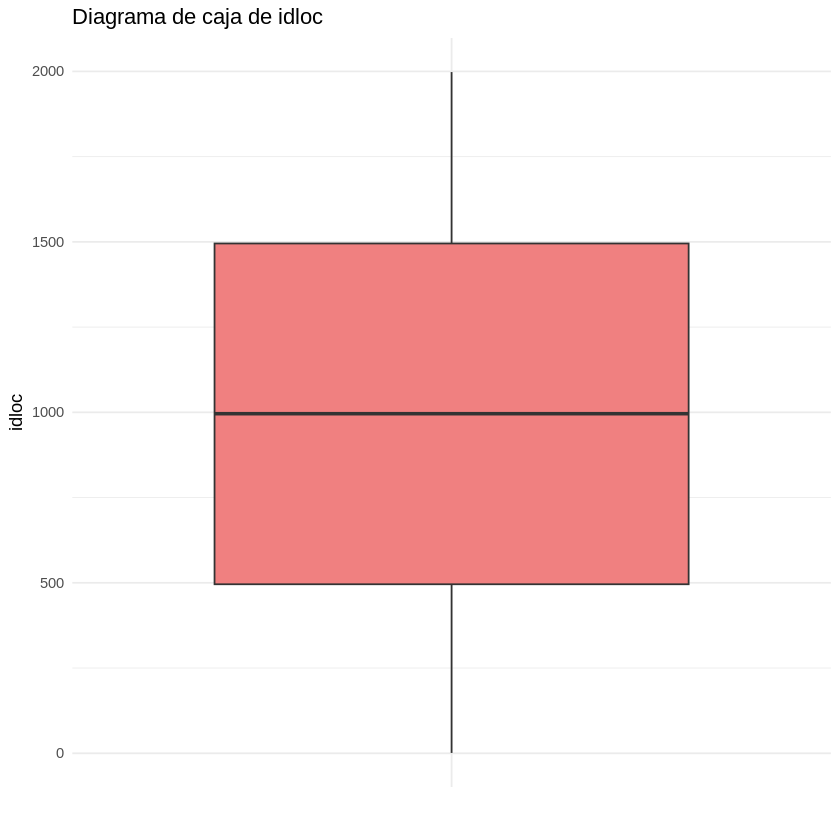

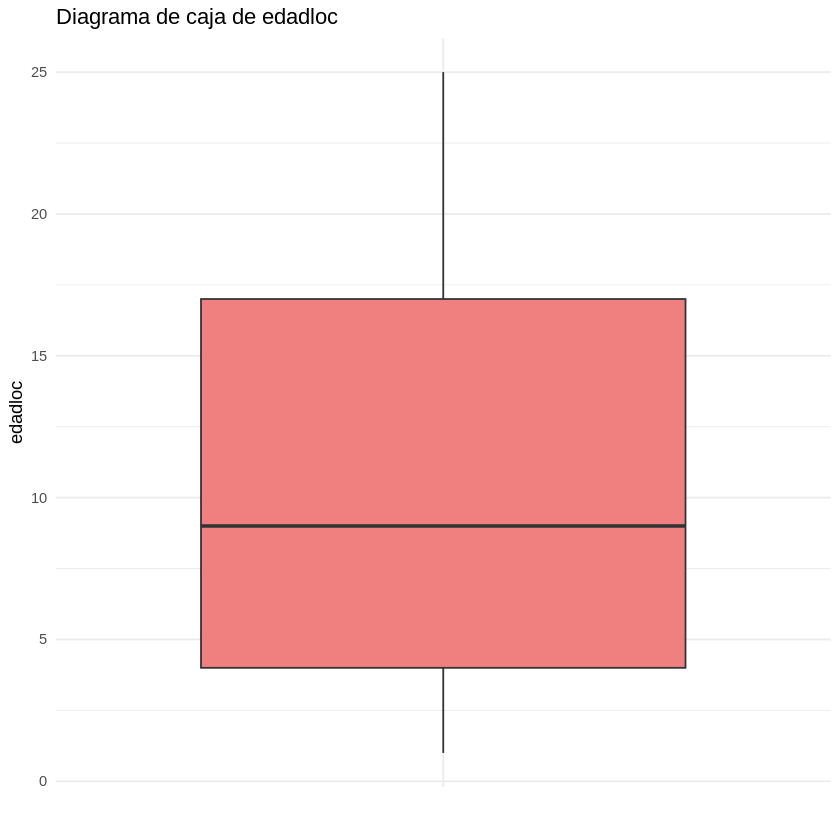

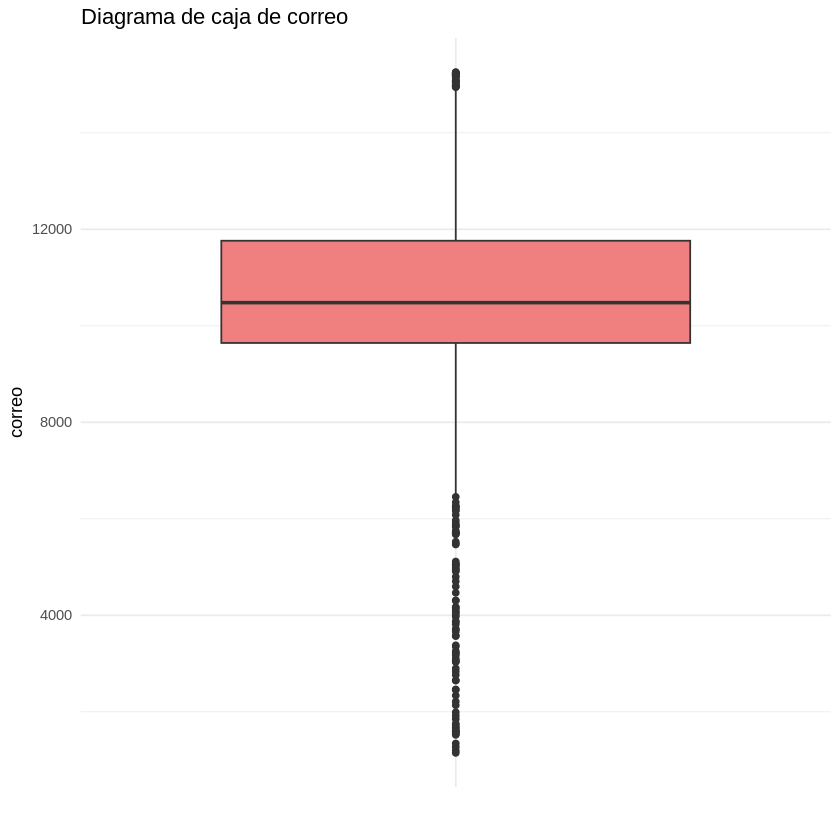

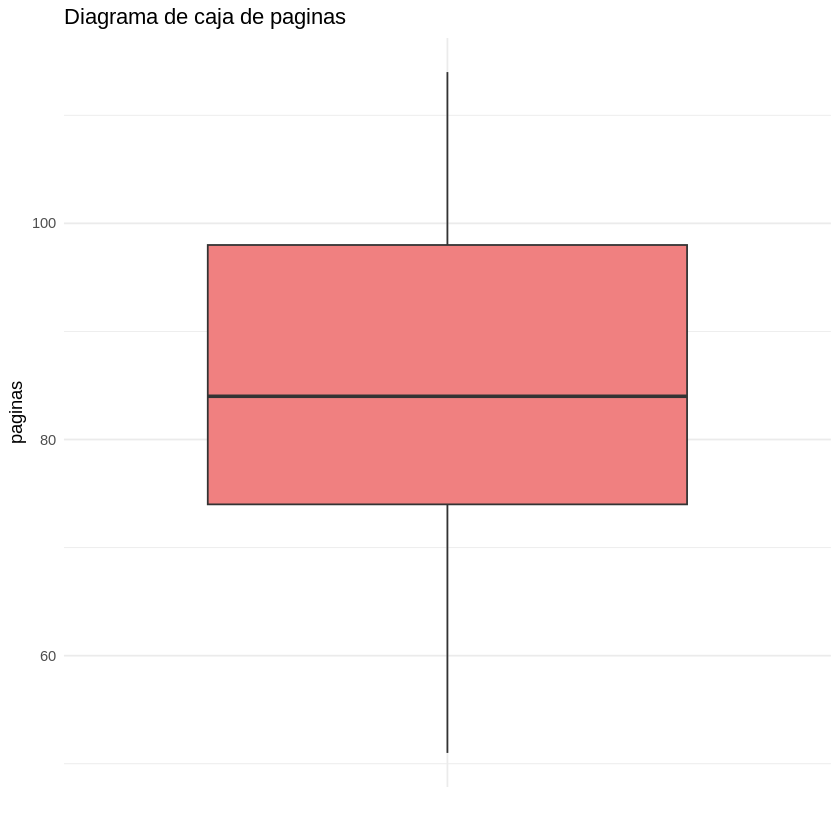

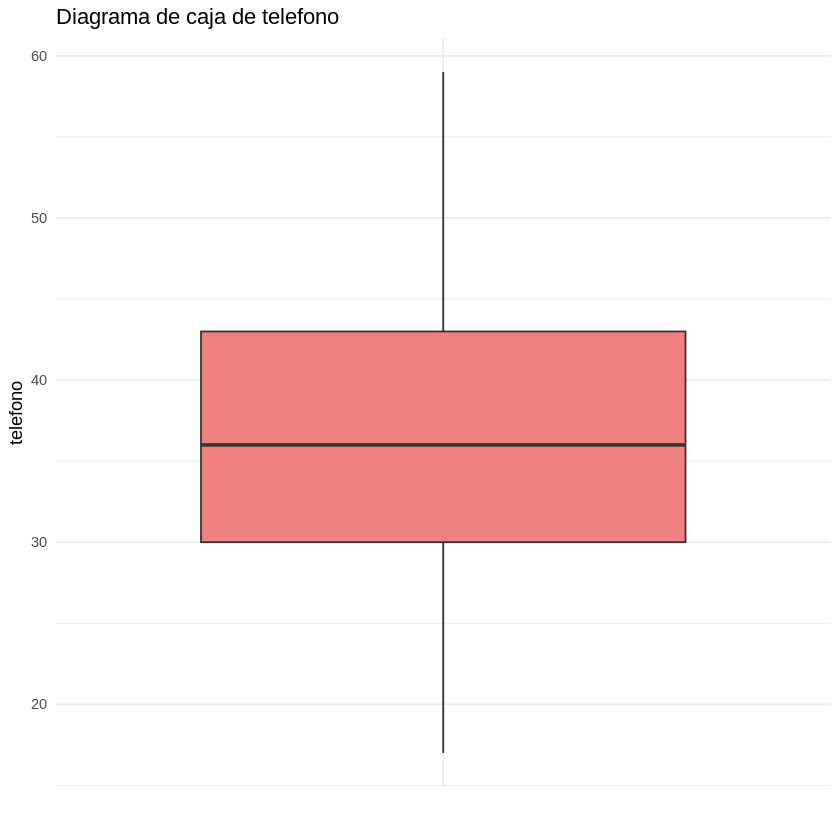

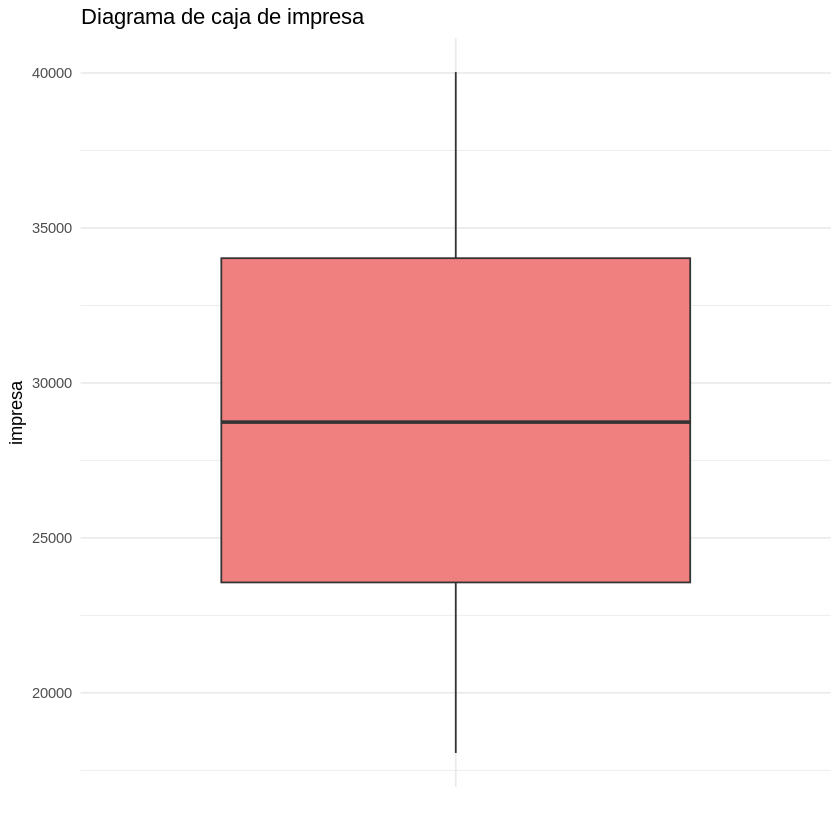

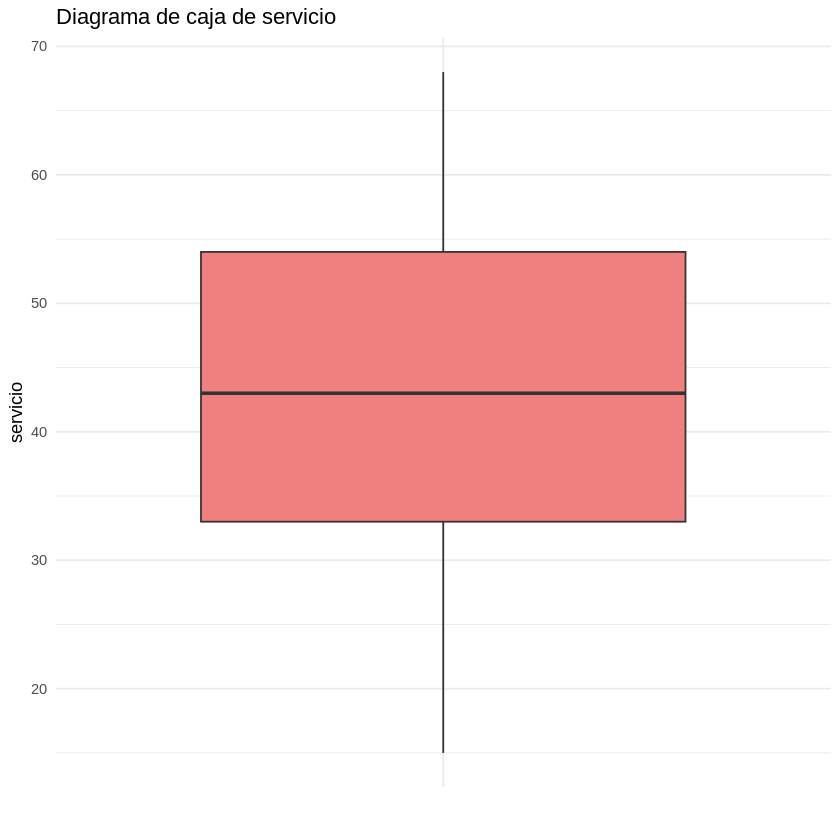

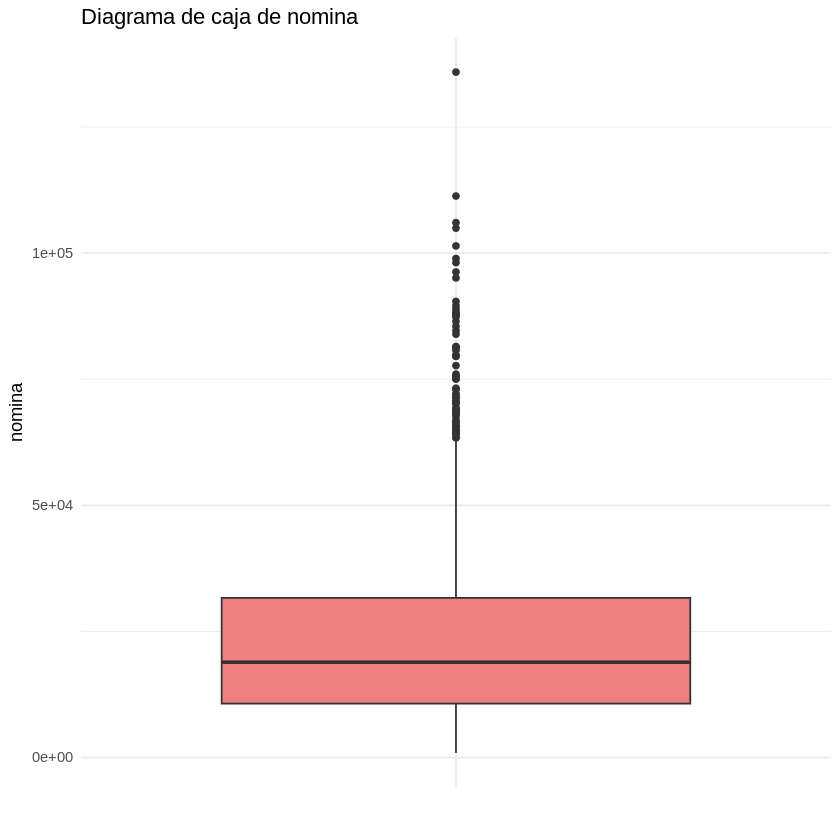

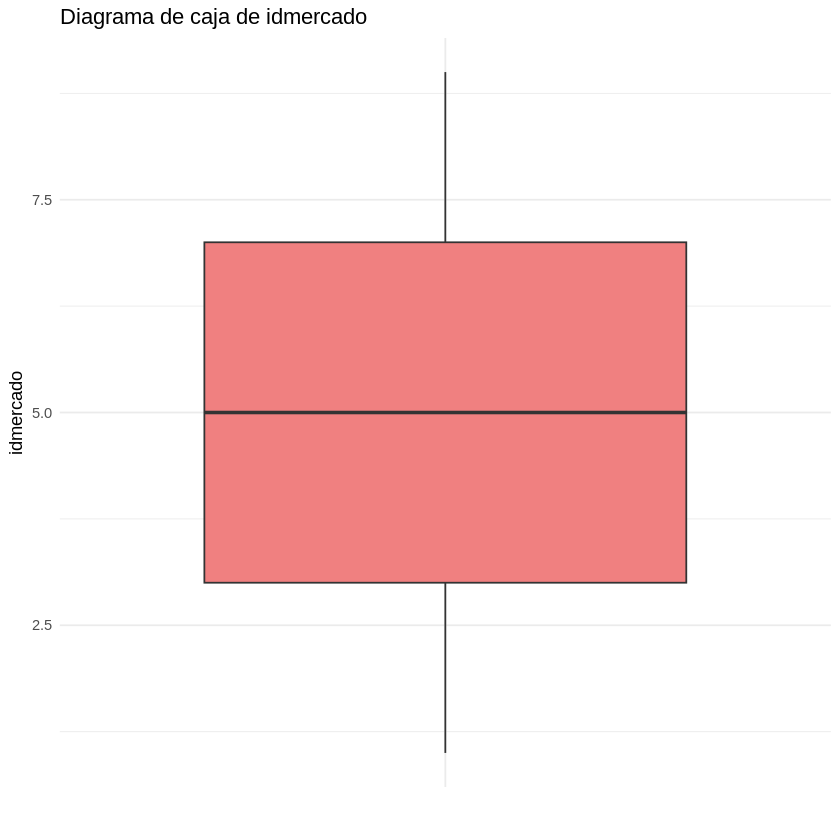

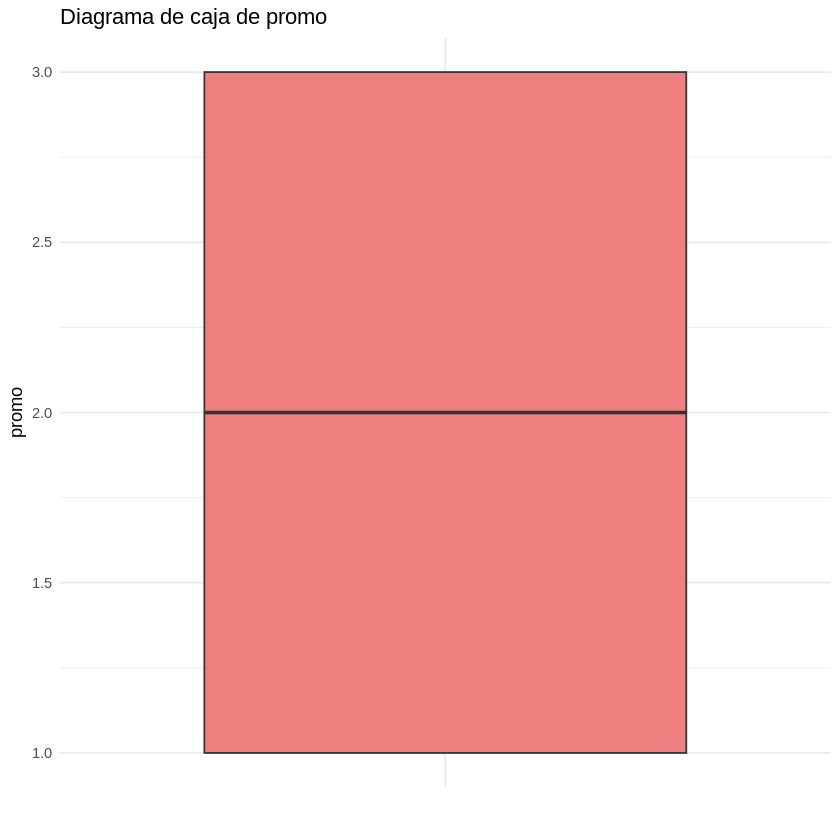

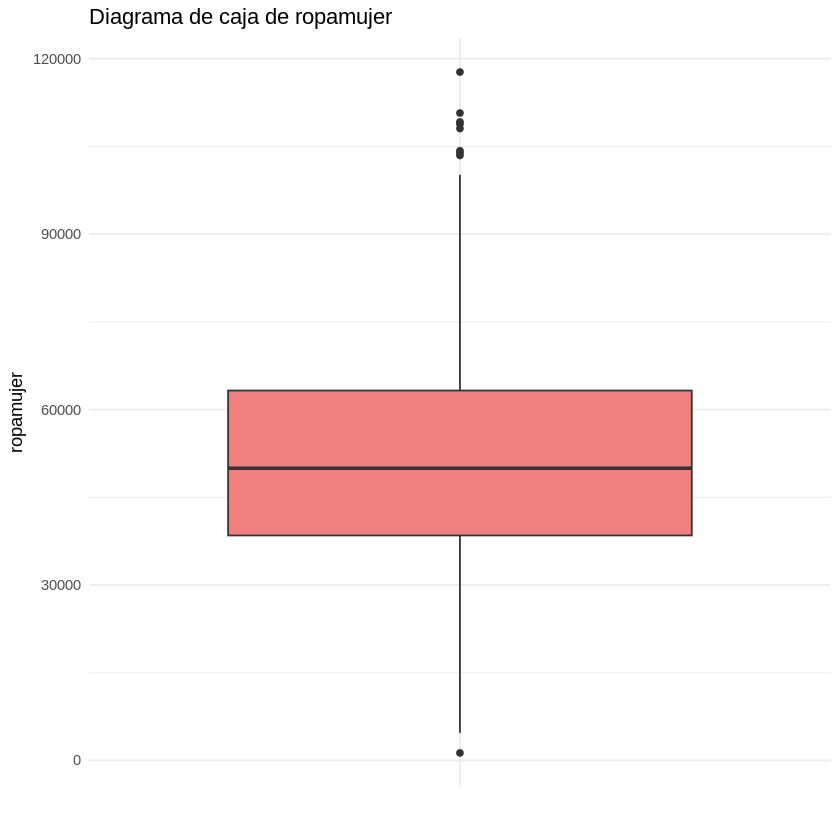

In [ ]:

# Encuentra columnas numéricas
numeric_cols <- names(train_data)[sapply(train_data, is.numeric)]

# Genera un boxplot por cada columna numérica
for (col in numeric_cols) {
  p <- ggplot(train_data, aes_string(x = "''", y = col)) +
    geom_boxplot(fill = "lightcoral") +
    labs(title = paste("Diagrama de caja de", col), y = col, x = "") +
    theme_minimal()

  print(p)
}

In [ ]:
# Seleccionar columnas numéricas
numeric_cols <- sapply(train_data, is.numeric)
numeric_data <- train_data[, numeric_cols]

# Función para detectar outliers usando el IQR
detectar_outliers <- function(columna) {
  Q1 <- quantile(columna, 0.25, na.rm = TRUE)
  Q3 <- quantile(columna, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  outliers <- columna[columna < (Q1 - 1.5 * IQR) | columna > (Q3 + 1.5 * IQR)]
  return(outliers)
}

# Revisar columnas con posibles outliers
for (col_name in names(numeric_data)) {
  outliers <- detectar_outliers(numeric_data[[col_name]])
  cat(col_name, "→", length(outliers), "outliers detectados\n")
}


idloc → 0 outliers detectados
edadloc → 0 outliers detectados
correo → 122 outliers detectados
paginas → 0 outliers detectados
telefono → 0 outliers detectados
impresa → 0 outliers detectados
servicio → 0 outliers detectados
nomina → 69 outliers detectados
idmercado → 0 outliers detectados
promo → 0 outliers detectados
ropamujer → 9 outliers detectados


In [ ]:
#Analisis de outliers de la variable dependiente
Q1 <- quantile(train$ropamujer, 0.25)
Q3 <- quantile(train$ropamujer, 0.75)
IQR_value <- Q3 - Q1

# Definir los límites inferior y superior
lower_limit <- Q1 - 1.5 * IQR_value
upper_limit <- Q3 + 1.5 * IQR_value



# Eliminar los outliers
train_no_outliers <- train[train$ropamujer >= lower_limit & train$ropamujer <= upper_limit, ]

# Ver cuántas filas quedan después de eliminar los outliers
nrow(train_no_outliers)

[1] 1591

In [ ]:
#Analisis outliers de las variables independientes
# Crear una copia del dataset original
train_no_outliers_inde <- train_data

# Eliminar outliers para cada columna numérica
for (col_name in names(numeric_data)) {
  Q1 <- quantile(train_no_outliers_inde[[col_name]], 0.25, na.rm = TRUE)
  Q3 <- quantile(train_no_outliers_inde[[col_name]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_limit <- Q1 - 1.5 * IQR
  upper_limit <- Q3 + 1.5 * IQR

  # Filtrar filas dentro del rango permitido
  train_no_outliers_inde <- train_no_outliers_inde[
    train_no_outliers_inde[[col_name]] >= lower_limit &
    train_no_outliers_inde[[col_name]] <= upper_limit, ]
}

# Mostrar cuántas filas quedan después de eliminar todos los outliers
nrow(train_no_outliers_inde)


[1] 1405

Deteción de datos nulos

In [ ]:
colSums(is.na(train_data))


idloc   edadloc    correo   paginas  telefono   impresa  servicio    nomina 
        0         0         0         0         0         0         0         0 
idmercado   tamamer     promo ropamujer 
        0         0         0         0

Análisi elimando todos los outliers

In [ ]:
sample_index1 <- sample(1:nrow(train_no_outliers_inde), size = 0.8 * nrow(train_no_outliers_inde))

train_set1 <- train_no_outliers_inde[sample_index1, ]

test_set1 <- train_no_outliers_inde[-sample_index1, ]

In [ ]:
modelo_inde=lm(ropamujer~.,data=train_set1)
summary(modelo_inde)


Call:
lm(formula = ropamujer ~ ., data = train_set1)

Residuals:
   Min     1Q Median     3Q    Max 
-27480  -7549   -390   7303  47786 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.072e+04  3.356e+03 -12.135  < 2e-16 ***
idloc          -2.961e+00  5.546e-01  -5.339 1.13e-07 ***
edadloc         8.033e+01  5.666e+01   1.418    0.157    
correo          1.866e+00  3.099e-01   6.020 2.37e-09 ***
paginas         1.940e+02  2.780e+01   6.978 5.13e-12 ***
telefono        3.421e+01  5.540e+01   0.618    0.537    
impresa         9.140e-01  5.162e-02  17.707  < 2e-16 ***
servicio        6.490e+02  3.160e+01  20.540  < 2e-16 ***
nomina         -3.640e-03  3.470e-02  -0.105    0.916    
idmercado       8.064e+01  1.246e+02   0.647    0.518    
tamamerMedian  -8.573e+02  9.853e+02  -0.870    0.384    
tamamerPequeño -3.129e+02  1.301e+03  -0.241    0.810    
promo           5.993e+02  4.996e+02   1.200    0.231    
---
Signif. codes:  0 ‘***’ 0.001 ‘

In [ ]:
AIC(modelo_inde)
pred<-predict(modelo_inde, test_set1, se.fit=TRUE)

RMSE<-sqrt(mean((pred$fit-test_set1$ropamujer)^2))
RMSE

[1] 24068.37

[1] 11181.77

Análisis eliminando unicamente los outliers de la variable independiente

In [ ]:
sample_index <- sample(1:nrow(train_no_outliers), size = 0.8 * nrow(train_no_outliers))

train_set <- train_no_outliers[sample_index, ]

test_set <- train_no_outliers[-sample_index, ]

In [ ]:
modelo=lm(ropamujer~.,data=train_set)
summary(modelo)


Call:
lm(formula = ropamujer ~ ., data = train_set)

Residuals:
   Min     1Q Median     3Q    Max 
-31154  -7492   -606   6916  55230 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.124e+04  2.868e+03 -14.383  < 2e-16 ***
edadloc         1.760e+01  5.595e+01   0.315   0.7532    
correo          1.699e+00  2.107e-01   8.065 1.70e-15 ***
paginas         1.921e+02  2.757e+01   6.965 5.29e-12 ***
telefono        7.931e+01  5.200e+01   1.525   0.1274    
impresa         9.237e-01  5.008e-02  18.445  < 2e-16 ***
servicio        6.554e+02  3.141e+01  20.862  < 2e-16 ***
nomina          1.852e-03  2.535e-02   0.073   0.9418    
idmercado2     -5.776e+02  1.303e+03  -0.443   0.6575    
idmercado3     -1.127e+03  1.287e+03  -0.875   0.3816    
idmercado4     -1.571e+03  1.376e+03  -1.141   0.2539    
idmercado5     -1.218e+03  1.316e+03  -0.926   0.3549    
idmercado6      3.136e+02  1.352e+03   0.232   0.8166    
idmercado7      5.495e+02  1.391e+03

In [ ]:
AIC(modelo)
pred<-predict(modelo, test_set, se.fit=TRUE)

RMSE<-sqrt(mean((pred$fit-test_set$ropamujer)^2))
RMSE

[1] 27342.13

[1] 10835.07

El AIC es mejor para el modelo que unicamente elimina los outliers de la variable dependiente, por lo tanto se continua el analisis con este supuesto.

In [ ]:
modelostep<- step(modelo,direction="both")

Start:  AIC=23730.35
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + idmercado + tamamer + promo

            Df  Sum of Sq        RSS   AIC
- idmercado  8 1.1704e+09 1.5713e+11 23724
- tamamer    2 6.3432e+07 1.5602e+11 23727
- nomina     1 6.6520e+05 1.5596e+11 23728
- edadloc    1 1.2324e+07 1.5597e+11 23728
<none>                    1.5596e+11 23730
- telefono   1 2.8983e+08 1.5625e+11 23731
- promo      2 6.9765e+08 1.5665e+11 23732
- paginas    1 6.0427e+09 1.6200e+11 23777
- correo     1 8.1016e+09 1.6406e+11 23793
- impresa    1 4.2378e+10 1.9833e+11 24034
- servicio   1 5.4213e+10 2.1017e+11 24108

Step:  AIC=23723.86
ropamujer ~ edadloc + correo + paginas + telefono + impresa + 
    servicio + nomina + tamamer + promo

            Df  Sum of Sq        RSS   AIC
- tamamer    2 5.2020e+07 1.5718e+11 23720
- nomina     1 1.5173e+05 1.5713e+11 23722
- edadloc    1 8.0638e+06 1.5713e+11 23722
- telefono   1 2.3567e+08 1.5736e+11 23724
<none> 

In [ ]:
head(train)

,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>
1,11,10042,68,35,22609.49,30,66307,8,Grande,2,43747.69
2,3,11909,107,42,24561.99,35,29107,8,Grande,2,37483.69
3,13,10669,75,33,38914.22,52,9519,4,Median,3,57523.00
4,7,6981,65,19,39204.97,30,28651,7,Grande,1,50338.06
5,22,10940,74,37,23947.08,46,30654,7,Grande,2,45675.55
6,8,12689,110,55,29968.16,57,30528,7,Median,1,78428.06


In [ ]:
model2<-lm(ropamujer~impresa+paginas+correo+servicio,data=train_set)
summary(model2)

pred<-predict(model2, test_set, se.fit=TRUE)
RMSE<-sqrt(mean((pred$fit-test_set$ropamujer)^2))
RMSE


Call:
lm(formula = ropamujer ~ impresa + paginas + correo + servicio, 
    data = train_set)

Residuals:
   Min     1Q Median     3Q    Max 
-32043  -7588   -816   7181  55133 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.239e+04  2.411e+03 -17.585  < 2e-16 ***
impresa      9.265e-01  4.996e-02  18.542  < 2e-16 ***
paginas      2.061e+02  2.599e+01   7.929 4.82e-15 ***
correo       1.882e+00  1.717e-01  10.958  < 2e-16 ***
servicio     6.620e+02  2.356e+01  28.096  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11170 on 1267 degrees of freedom
Multiple R-squared:  0.5787,	Adjusted R-squared:  0.5773 
F-statistic:   435 on 4 and 1267 DF,  p-value: < 2.2e-16


[1] 10632.03

In [ ]:
str(train)

'data.frame':	1600 obs. of  11 variables:
 $ edadloc  : int  11 3 13 7 22 8 22 8 4 4 ...
 $ correo   : int  10042 11909 10669 6981 10940 12689 9773 13018 9546 13050 ...
 $ paginas  : int  68 107 75 65 74 110 73 106 84 112 ...
 $ telefono : int  35 42 33 19 37 55 34 45 39 46 ...
 $ impresa  : num  22609 24562 38914 39205 23947 ...
 $ servicio : int  30 35 52 30 46 57 50 41 25 39 ...
 $ nomina   : int  66307 29107 9519 28651 30654 30528 27890 11107 111305 34739 ...
 $ idmercado: Factor w/ 9 levels "1","2","3","4",..: 8 8 4 7 7 7 8 3 7 9 ...
 $ tamamer  : Factor w/ 3 levels "Grande","Median",..: 1 1 2 1 1 2 2 2 1 1 ...
 $ promo    : Factor w/ 3 levels "1","2","3": 2 2 3 1 2 1 3 1 2 1 ...
 $ ropamujer: num  43748 37484 57523 50338 45676 ...


In [ ]:
model4 <- lm(ropamujer ~ impresa + paginas + correo + servicio + telefono + poly(edadloc,6) + poly(nomina,6) , data = train_set)
summary(model4)
modelostep<- step(model4,direction="both")


Call:
lm(formula = ropamujer ~ impresa + paginas + correo + servicio + 
    telefono + poly(edadloc, 6) + poly(nomina, 6), data = train_set)

Residuals:
   Min     1Q Median     3Q    Max 
-28817  -7238   -386   6652  48918 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -4.039e+04  2.407e+03 -16.779  < 2e-16 ***
impresa            9.125e-01  4.597e-02  19.851  < 2e-16 ***
paginas            1.791e+02  2.531e+01   7.077 2.45e-12 ***
correo             1.761e+00  1.927e-01   9.140  < 2e-16 ***
servicio           6.240e+02  2.981e+01  20.933  < 2e-16 ***
telefono           9.654e+01  4.778e+01   2.020  0.04356 *  
poly(edadloc, 6)1  1.418e+04  1.382e+04   1.026  0.30506    
poly(edadloc, 6)2 -1.278e+05  1.050e+04 -12.173  < 2e-16 ***
poly(edadloc, 6)3  6.438e+04  1.039e+04   6.196 7.84e-10 ***
poly(edadloc, 6)4  2.811e+04  1.029e+04   2.730  0.00642 ** 
poly(edadloc, 6)5 -6.214e+04  1.031e+04  -6.026 2.21e-09 ***
poly(edadloc, 6)6  1.305e+0

Start:  AIC=23513.43
ropamujer ~ impresa + paginas + correo + servicio + telefono + 
    poly(edadloc, 6) + poly(nomina, 6)

                   Df  Sum of Sq        RSS   AIC
- poly(nomina, 6)   6 6.1795e+08 1.3254e+11 23507
<none>                           1.3192e+11 23513
- telefono          1 4.2941e+08 1.3235e+11 23516
- paginas           1 5.2680e+09 1.3719e+11 23561
- correo            1 8.7888e+09 1.4071e+11 23594
- poly(edadloc, 6)  6 2.5003e+10 1.5692e+11 23722
- impresa           1 4.1453e+10 1.7337e+11 23859
- servicio          1 4.6098e+10 1.7802e+11 23893

Step:  AIC=23507.38
ropamujer ~ impresa + paginas + correo + servicio + telefono + 
    poly(edadloc, 6)

                   Df  Sum of Sq        RSS   AIC
<none>                           1.3254e+11 23507
- telefono          1 4.4661e+08 1.3298e+11 23510
+ poly(nomina, 6)   6 6.1795e+08 1.3192e+11 23513
- paginas           1 5.1485e+09 1.3768e+11 23554
- correo            1 8.8748e+09 1.4141e+11 23588
- poly(edadloc, 6)

In [ ]:
model5 <- lm(ropamujer ~ impresa + paginas + correo + servicio + poly(edadloc,6) + telefono , data = train_set)
summary(model5)
modelostep<- step(model5,direction="both")

pred<-predict(model5, test_set, se.fit=TRUE)
RMSE<-sqrt(mean((pred$fit-test_set$ropamujer)^2))
RMSE

predicciones <- predict(model5, newdata = test)
entrega <- data.frame(idloc=test_data$idloc, ropamujer = predicciones)

# Guardar archivo CSV para entregar en Kaggle
write.csv(entrega, "submission.csv", row.names = FALSE)


Call:
lm(formula = ropamujer ~ impresa + paginas + correo + servicio + 
    poly(edadloc, 6) + telefono, data = train_set)

Residuals:
   Min     1Q Median     3Q    Max 
-29061  -7269   -489   6780  49010 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -4.007e+04  2.399e+03 -16.701  < 2e-16 ***
impresa            9.120e-01  4.593e-02  19.856  < 2e-16 ***
paginas            1.767e+02  2.526e+01   6.996 4.26e-12 ***
correo             1.769e+00  1.925e-01   9.185  < 2e-16 ***
servicio           6.182e+02  2.964e+01  20.858  < 2e-16 ***
poly(edadloc, 6)1  1.643e+04  1.378e+04   1.192  0.23355    
poly(edadloc, 6)2 -1.288e+05  1.048e+04 -12.286  < 2e-16 ***
poly(edadloc, 6)3  6.440e+04  1.038e+04   6.204 7.47e-10 ***
poly(edadloc, 6)4  2.878e+04  1.028e+04   2.799  0.00521 ** 
poly(edadloc, 6)5 -6.193e+04  1.030e+04  -6.012 2.39e-09 ***
poly(edadloc, 6)6  1.341e+04  1.027e+04   1.306  0.19175    
telefono           9.829e+01  4.770e+01   2.0

Start:  AIC=23507.38
ropamujer ~ impresa + paginas + correo + servicio + poly(edadloc, 
    6) + telefono

                   Df  Sum of Sq        RSS   AIC
<none>                           1.3254e+11 23507
- telefono          1 4.4661e+08 1.3298e+11 23510
- paginas           1 5.1485e+09 1.3768e+11 23554
- correo            1 8.8748e+09 1.4141e+11 23588
- poly(edadloc, 6)  6 2.5350e+10 1.5789e+11 23718
- impresa           1 4.1471e+10 1.7401e+11 23852
- servicio          1 4.5763e+10 1.7830e+11 23883


[1] 9947.825

In [ ]:
model6 <- lm(ropamujer ~ poly(edadloc,5) + impresa + paginas + correo + servicio + telefono, data = train_no_outliers)
summary(model6)
modelostep<- step(model6,direction="both")
AIC(model6)


Call:
lm(formula = ropamujer ~ poly(edadloc, 5) + impresa + paginas + 
    correo + servicio + telefono, data = train_no_outliers)

Residuals:
   Min     1Q Median     3Q    Max 
-29514  -7344   -389   6763  49612 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -4.085e+04  2.134e+03 -19.143  < 2e-16 ***
poly(edadloc, 5)1  1.974e+04  1.343e+04   1.470  0.14181    
poly(edadloc, 5)2 -1.406e+05  1.041e+04 -13.510  < 2e-16 ***
poly(edadloc, 5)3  7.148e+04  1.028e+04   6.955 5.13e-12 ***
poly(edadloc, 5)4  3.286e+04  1.021e+04   3.218  0.00132 ** 
poly(edadloc, 5)5 -6.489e+04  1.023e+04  -6.344 2.91e-10 ***
impresa            9.090e-01  4.104e-02  22.150  < 2e-16 ***
paginas            1.775e+02  2.238e+01   7.933 4.01e-15 ***
correo             1.897e+00  1.709e-01  11.098  < 2e-16 ***
servicio           6.198e+02  2.595e+01  23.884  < 2e-16 ***
telefono           8.422e+01  4.216e+01   1.998  0.04593 *  
---
Signif. codes:  0 '***' 0.001 '**

Start:  AIC=29377.69
ropamujer ~ poly(edadloc, 5) + impresa + paginas + correo + servicio + 
    telefono

                   Df  Sum of Sq        RSS   AIC
<none>                           1.6401e+11 29378
- telefono          1 4.1423e+08 1.6443e+11 29380
- paginas           1 6.5330e+09 1.7055e+11 29438
- correo            1 1.2785e+10 1.7680e+11 29495
- poly(edadloc, 5)  5 2.9870e+10 1.9388e+11 29634
- impresa           1 5.0928e+10 2.1494e+11 29806
- servicio          1 5.9215e+10 2.2323e+11 29866


[1] 33894.75

In [ ]:
knots<-quantile(train_no_outliers$ropamujer,p=c(0.10,0.50,0.90))
model6 <- lm(ropamujer ~ bs(edadloc,knots=knots) + impresa + paginas + correo + servicio + telefono, data = train_no_outliers)
summary(model6)
AIC(model6)


Call:
lm(formula = ropamujer ~ bs(edadloc, knots = knots) + impresa + 
    paginas + correo + servicio + telefono, data = train_no_outliers)

Residuals:
   Min     1Q Median     3Q    Max 
-31051  -7292   -527   6756  50280 

Coefficients: (3 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -4.856e+04  2.106e+03 -23.059  < 2e-16 ***
bs(edadloc, knots = knots)1  2.904e+04  2.391e+03  12.142  < 2e-16 ***
bs(edadloc, knots = knots)2  2.689e+03  2.161e+03   1.244   0.2136    
bs(edadloc, knots = knots)3  6.017e+03  1.453e+03   4.140 3.66e-05 ***
bs(edadloc, knots = knots)4         NA         NA      NA       NA    
bs(edadloc, knots = knots)5         NA         NA      NA       NA    
bs(edadloc, knots = knots)6         NA         NA      NA       NA    
impresa                      9.025e-01  4.165e-02  21.667  < 2e-16 ***
paginas                      1.804e+02  2.271e+01   7.940 3.79e-15 ***
correo  

[1] 33940.91

In [ ]:
model6 <- gam(ropamujer ~ s(edadloc) + impresa + paginas + correo + servicio + telefono, data = train_no_outliers)
summary(model6)
#modelostep<- step(model6,direction="both")
AIC(model6)

predicciones <- predict(model6, newdata = test_final)
entrega <- data.frame(idloc=test_data$idloc, ropamujer = predicciones)

# Guardar archivo CSV para entregar en Kaggle
write.csv(entrega, "submission.csv", row.names = FALSE)


Family: gaussian 
Link function: identity 

Formula:
ropamujer ~ s(edadloc) + impresa + paginas + correo + servicio + 
    telefono

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.042e+04  2.141e+03 -18.885  < 2e-16 ***
impresa      9.060e-01  4.094e-02  22.129  < 2e-16 ***
paginas      1.802e+02  2.233e+01   8.072 1.36e-15 ***
correo       1.886e+00  1.705e-01  11.060  < 2e-16 ***
servicio     6.083e+02  2.643e+01  23.017  < 2e-16 ***
telefono     8.551e+01  4.203e+01   2.034   0.0421 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
             edf Ref.df    F p-value    
s(edadloc) 8.127  8.788 33.8  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.647   Deviance explained = 64.9%
GCV = 1.0408e+08  Scale est. = 1.0315e+08  n = 1591

[1] 33887.82